In [1]:
from datascience import *
import numpy as np

%matplotlib inline

---

- ### Scatter Plot (산점도)
    - ### 두 수치 변수 사이의 관계를 표시

In [3]:
table = Table.read_table("./csv/actors.csv")
table

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


- #### 출연 영화수에 대한 총 수익 산점도
    - #### Positive: 출연 영화수가 많을수록 총 수익 높음

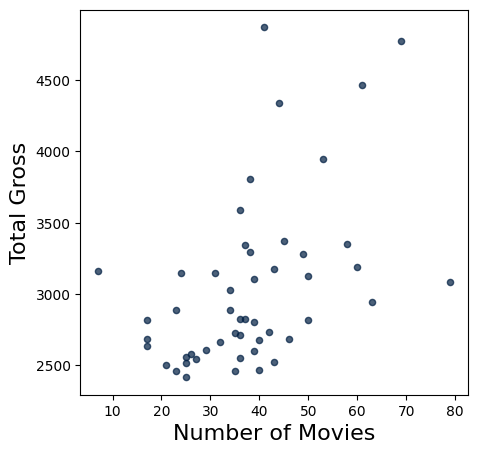

In [6]:
table.scatter("Number of Movies", "Total Gross")

- #### 출연 영화 수에 대한 영화당 평균 수익
    - #### Negative: 출연한 영화가 많을수록 영화당 평균 수익은 낮음
        - #### 배우가 출연하는 영화가 많을수록 스타일, 장르, 흥행 측면에서 변수가 더 커질 수 있으므로 <br> 출연 영화 수와 영화당 평균 수익은 다른 변수에 대한 이해도 필요함

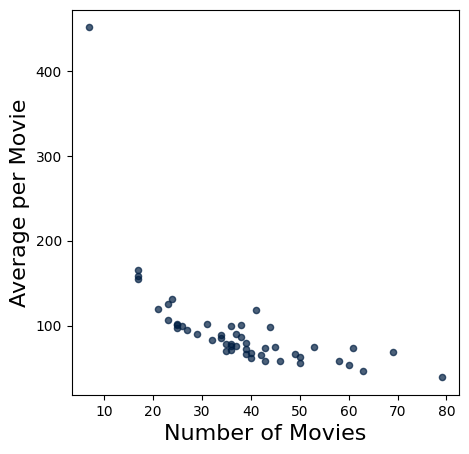

In [7]:
table.scatter("Number of Movies", "Average per Movie")

- #### 특이치 제거

In [14]:
table.where("Number of Movies", are.below_or_equal_to(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


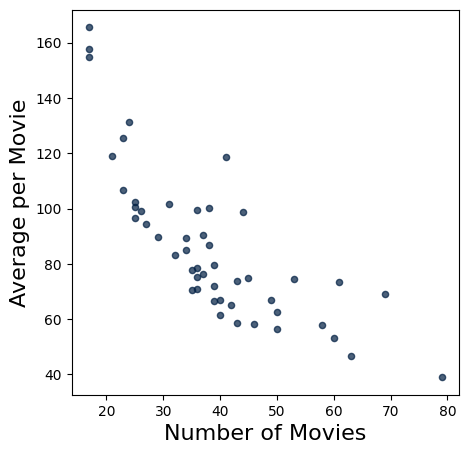

In [11]:
table.where("Number of Movies", are.above(10)).scatter("Number of Movies", "Average per Movie")

---

- ### Line Plots (선 그래프)
    - ### 순차적 정량 데이터 표시

In [22]:
table = table.read_table("./csv/movies_by_year.csv")
table

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


- #### 2000~2015 개봉된 영화 수의 선 그래프
    - #### 2009년에 개봉 영화 수 급감

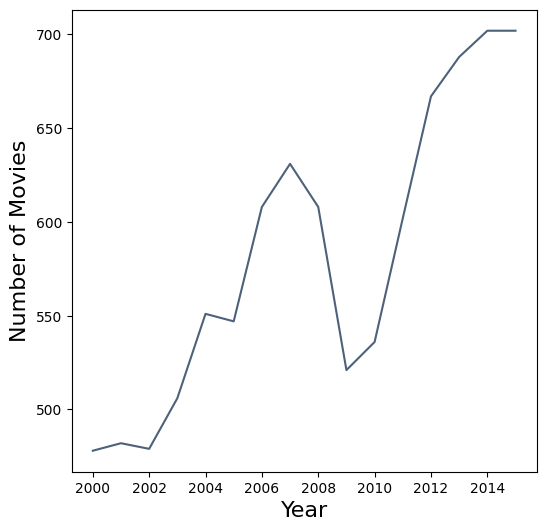

In [20]:
table.where("Year", are.between(2000, 2016)).plot("Year", "Number of Movies")

---

- ### Bar Chart
    - #### 범주형 분포를 시각화

In [24]:
table = Table().with_columns("Flavor", make_array("Chocolate", "Strawberry", "Vanila"),
                             "Number of Cartons", make_array(16, 5, 9))
table

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanila,9


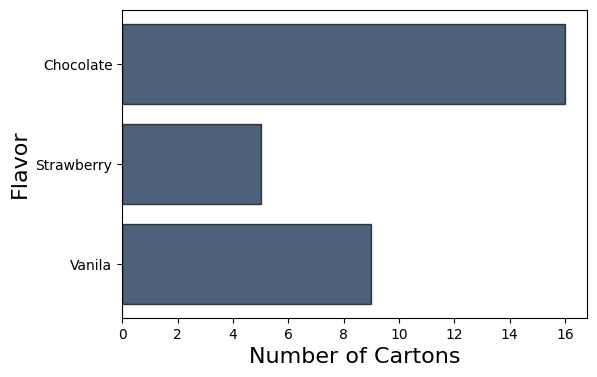

In [25]:
table.barh("Flavor", "Number of Cartons")

- #### 내림차순 정렬하여 표시

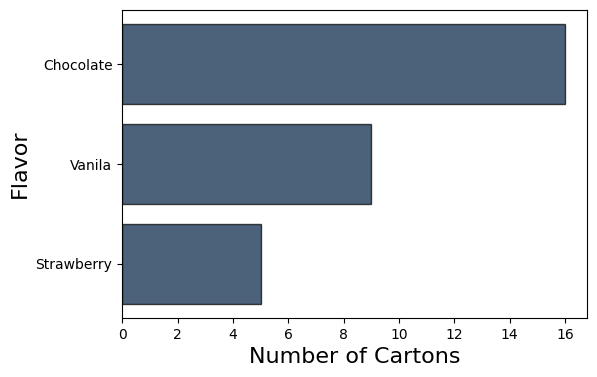

In [27]:
table.sort("Number of Cartons", descending=True).barh("Flavor")

---

- ### Table.group(column, collect)
    - #### 범주를 오름차순 정렬
    - #### collect
        - ##### None일 시 count
        - ##### sum
        - ##### max

In [28]:
table = Table.read_table("./csv/top_movies_2017.csv")
table

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


- #### Studio 당 영화 수

In [29]:
table.group("Studio")

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


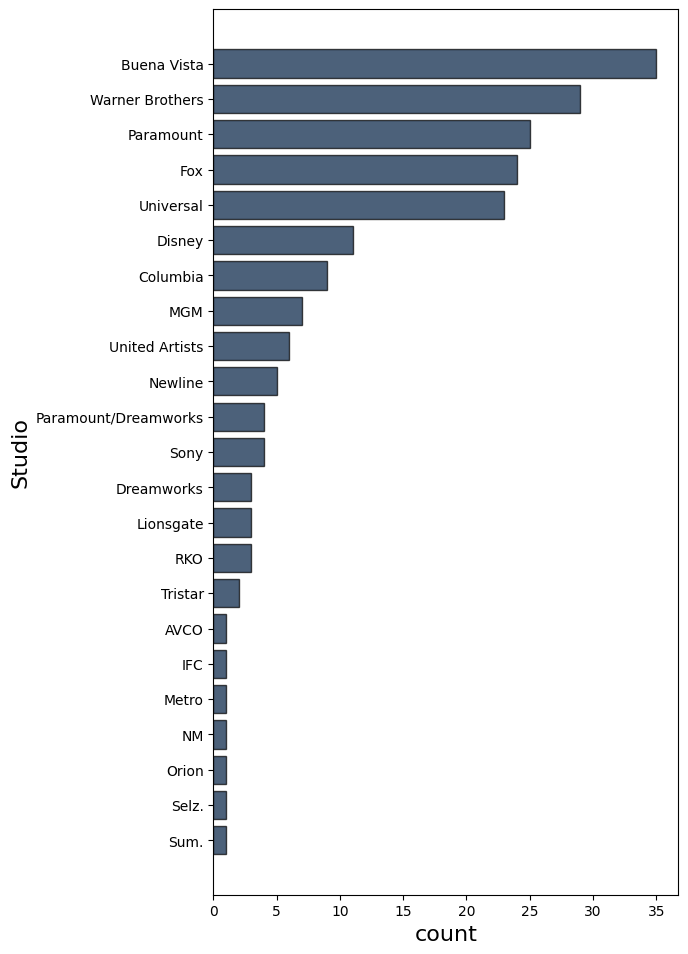

In [32]:
table.group("Studio").sort("count", descending=True).barh("Studio")

---

- ### Binning
    - #### 범위 내(current_bin <= n < next_bin)에 있는 수치의 값 세기

- #### 1. 백만불 단위 소수점 2자리까지만 나타낸 Adjusted Gross Column 추가

In [38]:
new_table = table.select("Title", "Gross (Adjusted)")
new_table = new_table.with_column("Adjusted Gross", np.round(new_table.column("Gross (Adjusted)") / 1e6, 2))
new_table = new_table.drop("Gross (Adjusted)")
new_table

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


- #### 2. Adjusted Gross의 최대, 최소값 알아내기

In [41]:
new_table.column("Adjusted Gross").min(), new_table.column("Adjusted Gross").max()

(338.41000000000003, 1796.1800000000001)

- #### 3. 300부터 2000까지 너비가 100인 bin 생성

In [43]:
bin = np.arange(300, 2001, 100)
bin

array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
       1400, 1500, 1600, 1700, 1800, 1900, 2000])

In [47]:
new_table.bin("Adjusted Gross", bins=bin).show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


- #### bin 마지막행은 항상 0
    - ##### 경계 나타내기 위해 존재
    - ##### 마지막행 바로 윗행이 [1900, 2000]임
- #### 마지막행을 제외한 행들은 [현재 bin, 다음bin)

- #### bins 옵션 사용하지 않으면 너비가 동일한 10개의 bin 생성

In [49]:
new_table.bin("Adjusted Gross").show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


- #### bins=n: 간격이 동일한 n개의 bin 생성

In [50]:
new_table.bin("Adjusted Gross", bins=4).show()

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


---

- ### Histogram
    - #### 양적 변수의 분포 시각화
    - #### 높이는 밀도와 비례, 면적은 항목 수와 비례
    - #### table.hist(column, unit, bins)
        - ##### column: 가로 축
        - ##### unit: 세로 축

In [56]:
new_table.bin("Adjusted Gross", bins=np.arange(300, 2001, 100))

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


- #### 동일한 너비의 10개 bin으로 Adjusted Gross 분포 시각화

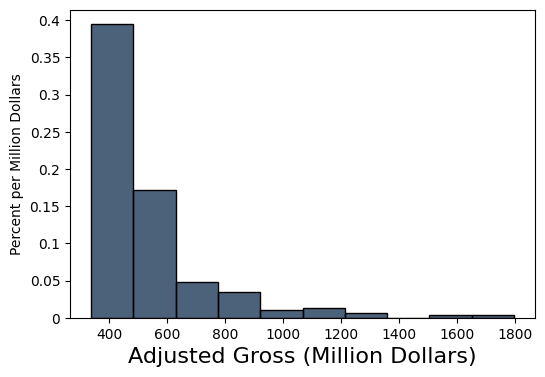

In [58]:
new_table.hist("Adjusted Gross", unit="Million Dollars")

- #### bins 지정하여 시각화

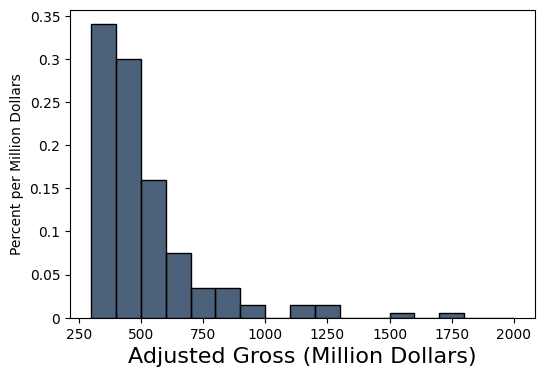

In [61]:
new_table.hist("Adjusted Gross", bins=np.arange(300, 2001, 100), unit="Million Dollars")

In [68]:
bin_table = new_table.bin("Adjusted Gross", bins=np.arange(300, 2001, 100))

total_count = bin_table.column("Adjusted Gross count").sum()
bin_table.with_column("Percent", bin_table.column("Adjusted Gross count") / total_count)

bin,Adjusted Gross count,Percent
300,68,0.34
400,60,0.3
500,32,0.16
600,15,0.075
700,7,0.035
800,7,0.035
900,3,0.015
1000,0,0
1100,3,0.015
1200,3,0.015
